In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.integrate import odeint
import scipy.integrate as it

In [ ]:
epsilon = 50
sigma = 1

minx = pow(2, 1/6)*sigma # x where it reaches the minimum
x = np.linspace(0.5, 3.5, 10000)
potential = lambda x : ((sigma/x)**12 - (sigma/x)**6)*4*epsilon + epsilon

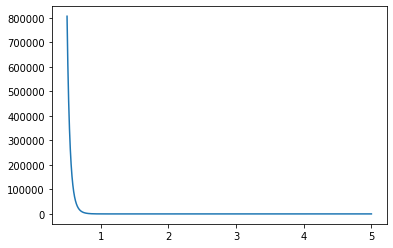

In [ ]:
plt.plot(x, potential(x))

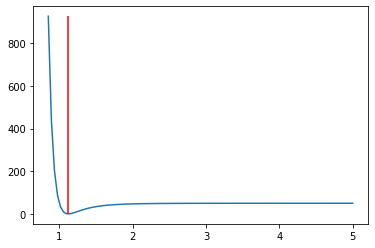

In [ ]:
plotx = np.linspace(0.85, 5, 100)
plt.plot(plotx, potential(plotx))
plt.vlines(minx, 0, potential(plotx[0]), colors=['red'])

In [ ]:
def HamiltonianODE(S,x,E):
    #set parameters
    hb2=1
    me=1
    #return a vector based on our definition of the ODE
    return [S[1],(2*me/hb2)*(potential(x)-E)*S[0]]

In [ ]:
InitVal=[0.001,0]

def func(E):
    model = lambda S,x : HamiltonianODE(S, x, E)  # S contains starting value and 1st derivative at x[0] (both are required for 2nd order ODE)
    SOL=odeint(model, InitVal,x)
    return SOL[:, 0]

#
def takeshot(E):
    SOL = func(E)
    return np.absolute(SOL[-1])

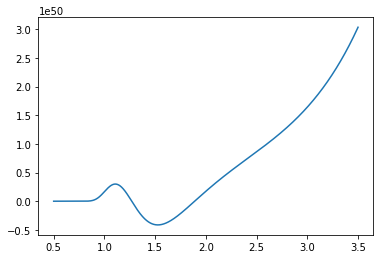

In [ ]:
plt.plot(x, func(epsilon-1))

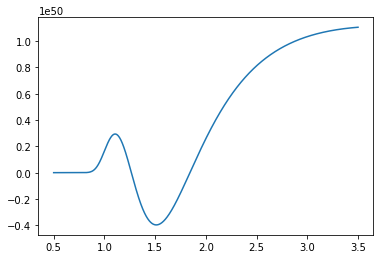

In [ ]:
plt.plot(x, func(epsilon)) # epsilon is the breakpoint, when it becmoes a free particle

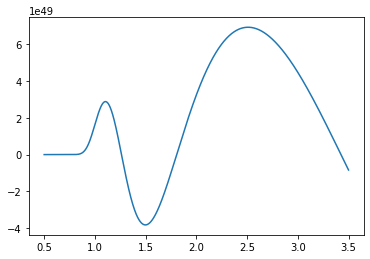

In [ ]:
plt.plot(x, func(epsilon+1)) 

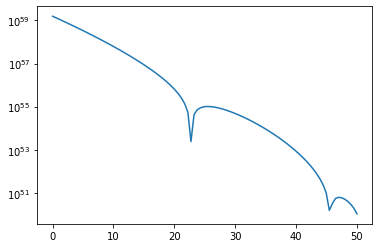

In [ ]:
def produce_plot(E_spectrum):
    Error=[]

    for E in E_spectrum:
        Error.append(takeshot(E))

    plt.plot(E_spectrum,Error,label='Error') 
    plt.yscale('log')

produce_plot(np.linspace(0, epsilon, 100))

In [ ]:
Winners = [newton(takeshot, 20), newton(takeshot, 43)]

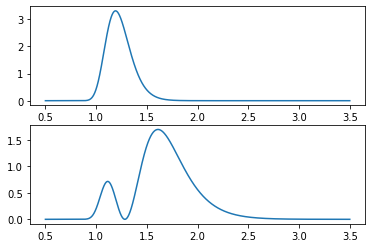

In [ ]:
def normalized(psi):
    integral = it.simps(np.absolute(psi)**2, x)
    return psi/np.sqrt(integral)
    
Psis = [normalized(func(E)) for E in Winners]

fig, axes = plt.subplots(len(Psis))
for i in range(len(Psis)):
    axes[i].plot(x, np.absolute(Psis[i])**2)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=062842dd-94f5-4311-b2d7-8d25a1c6c4f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>